In [104]:
import geopandas
import pandas as pd
from gerrychain import Graph, Partition, Election
from gerrychain.updaters import Tally, cut_edges
import maup
import matplotlib.pyplot as plt
import numpy as np

In [131]:
precincts = geopandas.read_file('NV_precincts_geo.geojson')
districts = geopandas.read_file('NV_districts_geo')
precincts.to_crs(districts.crs, inplace=True)
precincts_df = pd.read_excel("NV_precincts_df.xlsx")
precincts['name'] = precincts['PrecinctNa']
precincts_df['name'] = precincts_df['NAME20']
precincts_df = geopandas.GeoDataFrame(pd.merge(precincts,precincts_df, on="name"))
precincts['GEOID'] = precincts_df['GEOID']
precincts['GEOID20'] = precincts_df['GEOID20']

In [132]:
precincts

,loc_prec,prec_shp,loc_prec_G,PrecinctNa,G18RATG,G18DATG,G18OATG,G18NAATG,G18RGOV,G18NAGOV,...,G18OStTRE,G18NAStTRE,G18RSEN,G18NASEN,G18DSEN,G18OSEN,geometry,name,GEOID,GEOID20
0,"Douglas,Precinct 1 - Centerville",Precinct 1 - Centerville,"Douglas,01-Centerville",01-Centerville,481,133,24,20,480,9,...,9,22,482,7,156,18,"POLYGON Z ((259100.084 4314199.553 0.000, 2591...",01-Centerville,7000000US32007000001,32007000001
1,"Douglas,Precinct 2 - Fish Springs",Precinct 2 - Fish Springs,"Douglas,02-Fish Springs",02-Fish Springs,755,237,34,16,746,15,...,20,21,737,19,273,23,"POLYGON Z ((261674.408 4312864.004 0.000, 2617...",02-Fish Springs,7000000US32011000001,32011000001
2,"Douglas,Precinct 3 - Gardnerville",Precinct 3 - Gardnerville,"Douglas,03-Gardnerville",03-Gardnerville,472,319,36,34,479,18,...,25,38,483,16,335,31,"POLYGON Z ((260530.661 4314844.510 0.000, 2605...",03-Gardnerville,7000000US32027000001,32027000001
3,"Douglas,Precinct 7 - Minden",Precinct 7 - Minden,"Douglas,07-Minden",07-Minden,399,198,28,19,398,8,...,11,24,385,14,239,15,"POLYGON Z ((259115.347 4314497.838 0.000, 2591...",07-Minden,7000000US32029000001,32029000001
4,"Douglas,Precinct 12 - Dresslerville",Precinct 12 - Dresslerville,"Douglas,12-Dresslerville",12-Dresslerville,15,59,5,3,16,1,...,2,4,16,2,59,5,"POLYGON Z ((264214.971 4309566.878 0.000, 2645...",12-Dresslerville,7000000US32007000001,32007000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,"Washoe,4029",4029,"Washoe,402900",402900,0,0,0,0,0,0,...,0,0,0,0,0,0,"POLYGON Z ((247147.996 4401170.832 0.000, 2475...",402900,NaN,NaN
2069,"Washoe,6514",6514,"Washoe,651400",651400,302,361,41,23,299,13,...,27,28,306,13,397,20,"POLYGON Z ((266003.382 4381196.123 0.000, 2660...",651400,NaN,NaN
2070,"Washoe,1058",1058,"Washoe,105800",105800,0,0,0,0,0,0,...,0,0,0,0,0,0,"POLYGON Z ((250084.363 4377653.214 0.000, 2500...",105800,NaN,NaN
2071,"Washoe,6528",6528,"Washoe,652800",652800,0,0,0,0,0,0,...,0,0,0,0,0,0,"POLYGON Z ((265297.917 4387978.675 0.000, 2653...",652800,NaN,NaN


In [133]:
assignment = maup.assign(precincts, districts)
assignment.isna().sum()

/Users/kostadindev/.conda/envs/preprocessing/lib/python3.9/site-packages/maup/indexed_geometries.py:15: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometry.index = i
/Users/kostadindev/.conda/envs/preprocessing/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/kostadindev/.conda/envs/preprocessing/lib/python3.9/site-packages/ma

0

In [134]:
precincts['DISTRICT'] = assignment

In [135]:

from gerrychain import Graph, Partition
graph = Graph.from_file('NV_precincts_geo.geojson',ignore_errors=True)

/Users/kostadindev/.conda/envs/preprocessing/lib/python3.9/site-packages/gerrychain/graph/adjacency.py:21: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometries[i].id = i
/Users/kostadindev/.conda/envs/preprocessing/lib/python3.9/site-packages/gerrychain/graph/adjacency.py:66: UserWarning: Found overlaps among the given polygons. Indices of overlaps: {(258, 1640), (1516, 1986), (1691, 1957), (1942, 2021), (1557, 1758), (215, 238), (150, 212), (1640, 1957), (162, 1800), (50, 198), (1684, 1844), (48, 228), (217, 220), (196, 197), (1696, 1800), (1701, 2052), (197, 198), (130, 145), (280, 1264), (56, 1196), (238, 245), (69, 1553), (1703, 1732), (221, 238), (1738, 2034), (32, 277), (1774, 1902), (56, 1269), (206, 228), (1757, 2014), (79, 273), (1546, 1638), (1516, 1753), (1516, 1817), (1761, 1840), (225, 226), (1516, 1826), (1807, 1834), (5, 277), (131, 145), (1638, 1995), (1650, 1997), (1659, 199

In [137]:
graph.join(precincts, columns =["DISTRICT", "GEOID",'GEOID20'], left_index="PrecinctNa", right_index="PrecinctNa")

/Users/kostadindev/.conda/envs/preprocessing/lib/python3.9/site-packages/gerrychain/graph/graph.py:272: UserWarning: NA values found in column GEOID!
  warnings.warn("NA values found in column {}!".format(column))
/Users/kostadindev/.conda/envs/preprocessing/lib/python3.9/site-packages/gerrychain/graph/graph.py:272: UserWarning: NA values found in column GEOID!
  warnings.warn("NA values found in column {}!".format(column))
/Users/kostadindev/.conda/envs/preprocessing/lib/python3.9/site-packages/gerrychain/graph/graph.py:272: UserWarning: NA values found in column GEOID20!
  warnings.warn("NA values found in column {}!".format(column))


In [138]:
plan = Partition(graph, "DISTRICT")

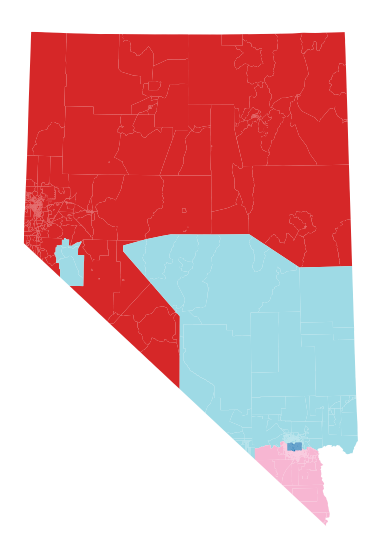

In [139]:
plan.plot(precincts, figsize=(10,10), cmap ="tab20")
plt.axis('off')
plt.show()

In [143]:
from gerrychain import MarkovChain
from gerrychain.constraints import single_flip_contiguous
from gerrychain.proposals import propose_random_flip
from gerrychain.accept import always_accept

chain = MarkovChain(
    proposal=propose_random_flip,
    constraints=[],
    accept=always_accept,
    initial_state=plan,
    total_steps=1000
)

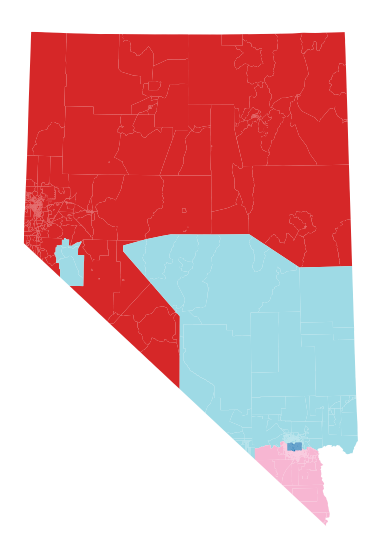

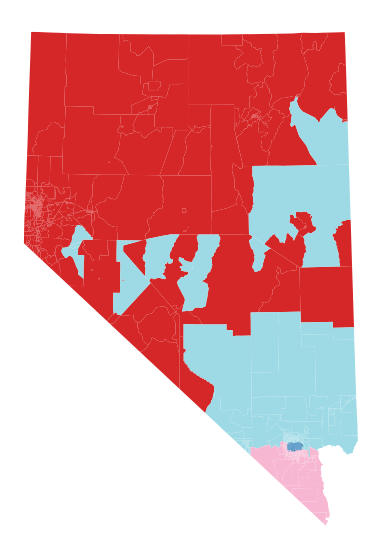

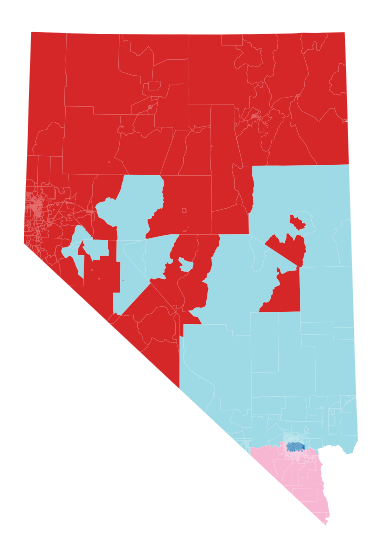

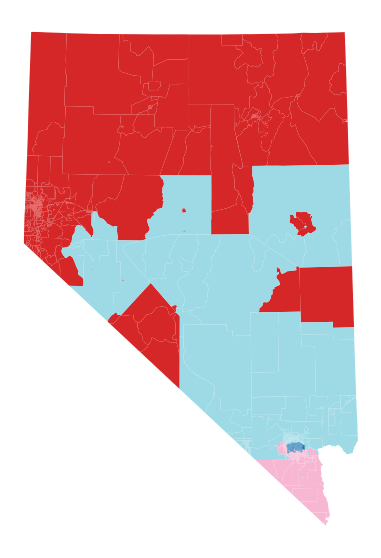

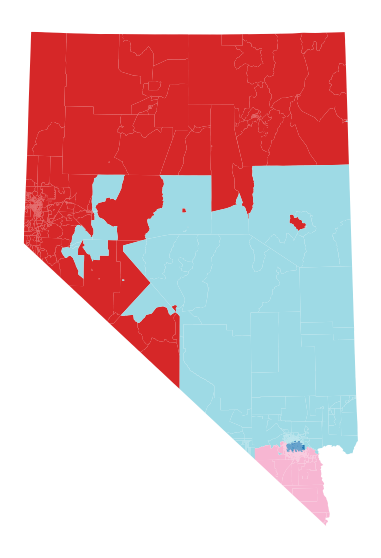

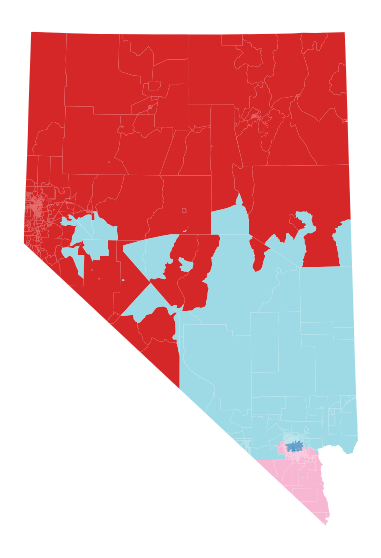

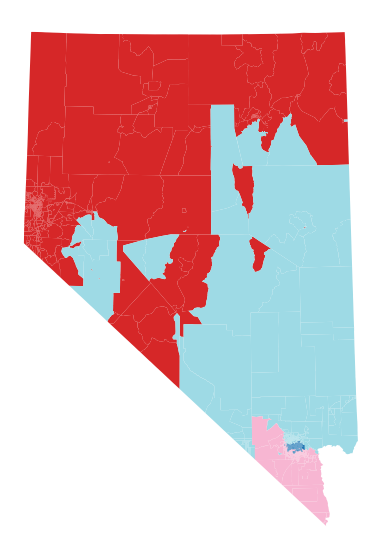

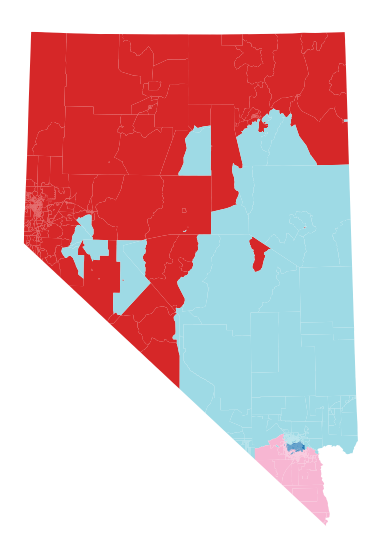

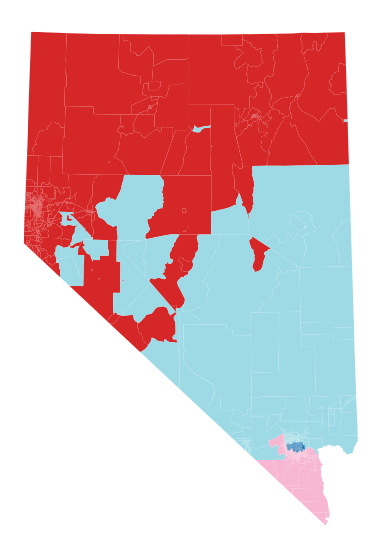

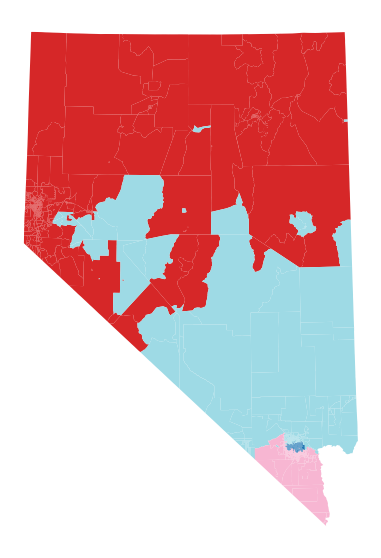

In [155]:
final = None
for idx, partition in enumerate(chain):
    #print(f"iteration {idx}/1000")
    if idx%100== 0:
        partition.plot(precincts, figsize=(10,10), cmap ="tab20")
        plt.axis('off')
        plt.show()
        final = partition

In [157]:
final

KeyError: 0